### AI-06 Quiz  

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

#### Parameters  

In [2]:
csv_in = '../ai-05/ai-05/iris.csv'

#### Read CSV file  

In [3]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=2, header=0)
print(df.shape)
print(df.info())
display(df.head())
items = df.columns
print(items)

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepal_len    150 non-null    float64
 1   sepal_width  150 non-null    float64
 2   petal_len    150 non-null    float64
 3   petal_width  150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Index(['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'class'], dtype='object')


In [5]:
v = df.loc[:, ['petal_len', 'petal_width']]
iris = v.index
print(iris)

RangeIndex(start=0, stop=150, step=1)


In [6]:
Z = linkage(v, method='ward', metric='euclidean')
# print(Z.shape)
# print(Z)
n_data = Z.shape[0]
df_Z = pd.DataFrame(Z,
                    columns=['label1', 'label2', 'distance', '#members'],
                    index=['merged{}'.format(i+1+n_data) for i in range(n_data)])
df_Z['label1'] = df_Z['label1'].astype('int')
df_Z['label2'] = df_Z['label2'].astype('int')
df_Z['#members'] = df_Z['#members'].astype('int')
display(df_Z)
print(n_data)

,label1,label2,distance,#members
merged150,0,1,0.000000,2
merged151,4,150,0.000000,3
merged152,2,36,0.000000,2
merged153,3,7,0.000000,2
merged154,8,151,0.000000,4
...,...,...,...,...
merged294,270,293,2.409332,28
merged295,288,292,3.569174,46
merged296,291,294,4.674433,54
merged297,295,296,10.527679,100


149


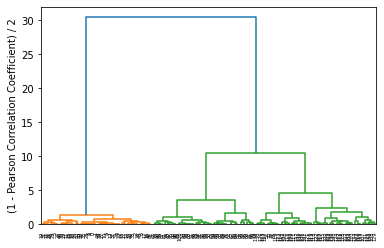

In [7]:
dendr = dendrogram(Z, labels=iris)
plt.xticks(rotation=90)
plt.ylabel('(1 - Pearson Correlation Coefficient) / 2')
plt.show()

In [8]:
n_cluster = 3
dist = df_Z['distance']
print('=== n_cluster:', n_cluster, '===')
cls = pd.Series(fcluster(Z, n_cluster, criterion='maxclust'), index=iris)
print('dist:', dist[n_data-n_cluster])
print(cls)

=== n_cluster: 3 ===
dist: 4.674433184924735
0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Length: 150, dtype: int32


In [9]:
ct = pd.crosstab(df['class'], cls)
display(ct)


col_0,1,2,3
class,,,
Iris-setosa,50,0,0
Iris-versicolor,0,45,5
Iris-virginica,0,1,49


c1 50
c2 46
c3 54


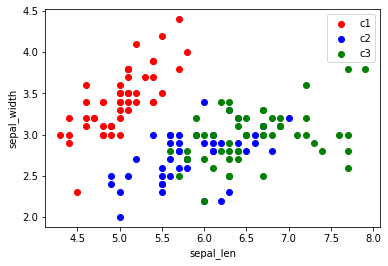

In [13]:
iris_classes = df['class'].unique()
colors = ['red', 'blue', 'green']
marker_dic = {'Iris-setosa':'o', 'Iris-versicolor':'x', 'Iris-virginica':'D'}
for i in range(n_cluster):
    color = colors[i]
    label = f'c{i+1}'
    df_points = df[ (cls==(i+1)) ]
    print(label, df_points.shape[0])
    plt.scatter(df_points['sepal_len'], df_points['sepal_width'], label=label, color=color, marker=marker)
plt.xlabel('sepal_len')
plt.ylabel('sepal_width')
plt.legend()
plt.show()